In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from functools import partial

## Benchmarking first to the supporting spreadsheet from Pu et al. (2017)

In [2]:
out=pt.import_excel('PythonInput_OlLiq_Thermometers_Putirka.xlsx', sheet_name="T_Pu2017_iteration")
my_input=out['my_input']
myOls=out['Ols']
myLiquids=out['Liqs']

In [3]:
myOls.head()

,SiO2_Ol,TiO2_Ol,Al2O3_Ol,FeOt_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,Cr2O3_Ol,NiO_Ol,Sample_ID_Ol
0,41.24,0.0,0.03,7.77,0.12,51.35,0.14,0.0,0.0,0.07,0.49,0
1,40.95,0.0,0.03,8.32,0.10,50.56,0.13,0.0,0.0,0.05,0.51,1
2,41.05,0.0,0.02,8.24,0.13,50.86,0.12,0.0,0.0,0.06,0.47,2
3,41.11,0.0,0.02,7.75,0.13,50.90,0.06,0.0,0.0,0.08,1.13,3
4,40.81,0.0,0.02,9.62,0.16,49.49,0.06,0.0,0.0,0.03,1.06,4


In [4]:
myLiquids.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,53.083519,0.825999,13.734174,8.130330,0.146814,11.156961,8.826404,2.796800,1.100238,0.0,0.198761,0.0,0.0,0.041996,0.0,0.0,0
1,53.083519,0.825999,13.734174,8.130330,0.146814,11.156961,8.826404,2.796800,1.100238,0.0,0.198761,0.0,0.0,0.041996,0.0,0.0,1
2,53.083519,0.825999,13.734174,8.130330,0.146814,11.156961,8.826404,2.796800,1.100238,0.0,0.198761,0.0,0.0,0.041996,0.0,0.0,2
3,67.729724,0.242009,14.719667,2.502716,0.054920,4.985198,2.801140,4.280503,2.587937,0.0,0.096185,0.0,0.0,0.025834,0.0,0.0,3
4,67.729724,0.242009,14.719667,2.502716,0.054920,4.985198,2.801140,4.280503,2.587937,0.0,0.096185,0.0,0.0,0.025834,0.0,0.0,4


## Checking Ni temperature

Youve selected a P-independent function


Text(0, 0.5, 'Temp Thermobar')

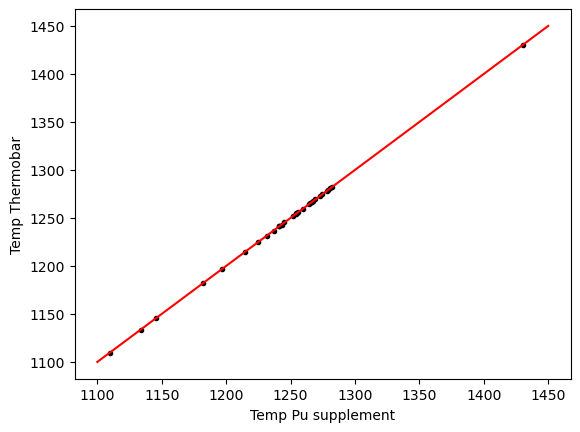

In [5]:
T_pu_Ni=pt.calculate_ol_liq_temp(liq_comps=myLiquids, ol_comps=myOls, equationT="T_Pu2017", P=0)
T_pu_Ni

# Plot vs the supplement
plt.plot(my_input['TNi(˚C)'], T_pu_Ni['T_K_calc']-273.15, '.k')
plt.plot([1100, 1450], [1100, 1450], '-r')
plt.xlabel('Temp Pu supplement')
plt.ylabel('Temp Thermobar')

## Checking Mg temperature

Youve selected a P-independent function


Text(0, 0.5, 'Temp Thermobar')

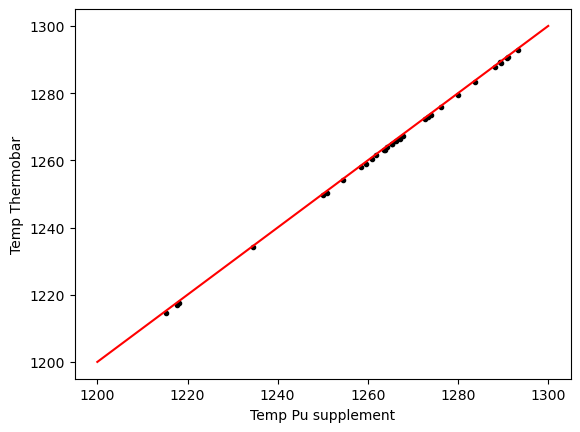

In [6]:
T_pu_Mg=pt.calculate_ol_liq_temp(liq_comps=myLiquids, ol_comps=myOls, equationT="T_Pu2017_Mg", P=0)
T_pu_Mg

# Plot vs the supplement
plt.plot(my_input['TMg(˚C)'], T_pu_Mg['T_K_calc']-273.15, '.k')
plt.plot([1200, 1300], [1200, 1300], '-r')
plt.xlabel('Temp Pu supplement')
plt.ylabel('Temp Thermobar')



## Lets do water calculation from their supplement

Text(0, 0.5, 'Calculated H2O (Thermobar)')

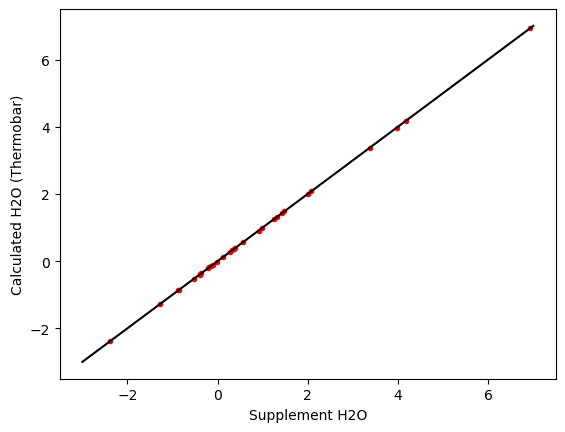

In [7]:
H_pu=pt.calculate_ol_liq_hygr(liq_comps=myLiquids, ol_comps=myOls, equationH="H_Pu2017")

plt.plot(H_pu,my_input['minH2O(wt%)'], '.r' )
plt.plot([-3, 7], [-3, 7], '-k')
plt.xlabel('Supplement H2O')
plt.ylabel('Calculated H2O (Thermobar)')


## Now lets test melt matching - Works against first 30 in spreasdheet. 

In [8]:
H_pu=pt.calculate_ol_liq_hygr_matching(liq_comps=myLiquids, ol_comps=myOls, equationH="H_Gavr2016", P=0)
H_pu

Considering N=31 Ol & N=31 Liqs, which is a total of N=961 Liq- Ol pairs, be patient if this is >>1 million!


,H2O_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,...,ID_Ol,Si_Ol_cat_frac,Mg_Ol_cat_frac,Fet_Ol_cat_frac,Ca_Ol_cat_frac,Al_Ol_cat_frac,Na_Ol_cat_frac,K_Ol_cat_frac,Mn_Ol_cat_frac,Ti_Ol_cat_frac
0,3.344496,53.083519,0.825999,13.734174,8.130330,0.146814,11.156961,8.826404,2.796800,1.100238,...,0.0,0.331044,0.614492,0.052161,0.001204,0.000284,0.0,0.0,0.000816,0.0
1,3.344496,53.083519,0.825999,13.734174,8.130330,0.146814,11.156961,8.826404,2.796800,1.100238,...,0.0,0.331044,0.614492,0.052161,0.001204,0.000284,0.0,0.0,0.000816,0.0
2,3.344496,53.083519,0.825999,13.734174,8.130330,0.146814,11.156961,8.826404,2.796800,1.100238,...,0.0,0.331044,0.614492,0.052161,0.001204,0.000284,0.0,0.0,0.000816,0.0
3,0.109792,67.729724,0.242009,14.719667,2.502716,0.054920,4.985198,2.801140,4.280503,2.587937,...,0.0,0.331044,0.614492,0.052161,0.001204,0.000284,0.0,0.0,0.000816,0.0
4,0.109792,67.729724,0.242009,14.719667,2.502716,0.054920,4.985198,2.801140,4.280503,2.587937,...,0.0,0.331044,0.614492,0.052161,0.001204,0.000284,0.0,0.0,0.000816,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,-0.382755,54.348233,0.741201,14.933344,7.206356,0.133863,10.236738,7.995214,2.776273,1.431539,...,30.0,0.333378,0.599951,0.063135,0.002092,0.000479,0.0,0.0,0.000965,0.0
957,0.758608,56.061035,0.980804,15.569632,6.606731,0.116901,7.758094,6.935405,3.634287,2.057488,...,30.0,0.333378,0.599951,0.063135,0.002092,0.000479,0.0,0.0,0.000965,0.0
958,0.758608,56.061035,0.980804,15.569632,6.606731,0.116901,7.758094,6.935405,3.634287,2.057488,...,30.0,0.333378,0.599951,0.063135,0.002092,0.000479,0.0,0.0,0.000965,0.0
959,0.758608,56.061035,0.980804,15.569632,6.606731,0.116901,7.758094,6.935405,3.634287,2.057488,...,30.0,0.333378,0.599951,0.063135,0.002092,0.000479,0.0,0.0,0.000965,0.0


In [13]:
H_pu['SiO2_Ol'].iloc[0:30]

0     41.24
1     41.24
2     41.24
3     41.24
4     41.24
5     41.24
6     41.24
7     41.24
8     41.24
9     41.24
10    41.24
11    41.24
12    41.24
13    41.24
14    41.24
15    41.24
16    41.24
17    41.24
18    41.24
19    41.24
20    41.24
21    41.24
22    41.24
23    41.24
24    41.24
25    41.24
26    41.24
27    41.24
28    41.24
29    41.24
Name: SiO2_Ol, dtype: float64

In [9]:
H_pu=pt.calculate_ol_liq_hygr(liq_comps=myLiquids, ol_comps=myOls, equationH="H_Gavr2016", P=0)
H_pu

0     3.344496
1     3.794283
2     4.244070
3     5.479034
4     5.479034
5     6.150189
6     3.188077
7     3.188077
8     2.241552
9     8.753414
10    7.787089
11    8.850046
12    2.511423
13    2.511423
14    2.511423
15    3.313896
16    4.115673
17    2.913007
18    3.761013
19    2.256798
20    2.256798
21    8.490553
22    2.564334
23    8.984405
24    5.019150
25    8.494980
26    8.494980
27    3.469336
28    3.198263
29    3.469336
30   -1.298391
dtype: float64

In [10]:
H_pu

0     3.344496
1     3.794283
2     4.244070
3     5.479034
4     5.479034
5     6.150189
6     3.188077
7     3.188077
8     2.241552
9     8.753414
10    7.787089
11    8.850046
12    2.511423
13    2.511423
14    2.511423
15    3.313896
16    4.115673
17    2.913007
18    3.761013
19    2.256798
20    2.256798
21    8.490553
22    2.564334
23    8.984405
24    5.019150
25    8.494980
26    8.494980
27    3.469336
28    3.198263
29    3.469336
30   -1.298391
dtype: float64

In [11]:
H_pu=pt.calculate_ol_liq_hygr_matching(liq_comps=myLiquids, ol_comps=myOls, equationH="H_Pu2017", P=0)


Considering N=31 Ol & N=31 Liqs, which is a total of N=1922 Liq- Ol pairs, be patient if this is >>1 million!
